In [15]:
# develop an mlp for blobs dataset
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

KeyboardInterrupt: 

In [19]:
# save models to file toward the end of a training run
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
n_epochs, n_save_after = 500, 490
for i in range(n_epochs):
  # fit model for a single epoch
  model.fit(trainX, trainy, epochs=1, verbose=1)
  # check if we should save the model
  if i >= n_save_after:
    model.save('model_' + str(i) + '.h5')

4/4 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8400


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.8500


In [21]:
#average the weights of multiple loaded models
from keras.models import load_model
from keras.models import clone_model
from numpy import average
from numpy import array

# load models from file
def load_all_models(n_start, n_end):
  all_models = list()
  for epoch in range(n_start, n_end):
    # define filename for this ensemble
    filename = '/content/model_' + str(epoch) + '.h5'
    # load model from file
    model = load_model(filename)
    # add to list of members
    all_models.append(model)
    print('>loaded %s' % filename)
  return all_models

# create a model from the weights of multiple models
def model_weight_ensemble(members, weights):
  # determine how many layers need to be averaged
  n_layers = len(members[0].get_weights())
  # create an set of average model weights
  avg_model_weights = list()
  for layer in range(n_layers):
    # collect this layer from each model
    layer_weights = array([model.get_weights()[layer] for model in members])
    # weighted average of weights for this layer
    avg_layer_weights = average(layer_weights, axis=0, weights=weights)
    # store average layer weights
    avg_model_weights.append(avg_layer_weights)
  # create a new model with the same structure
  model = clone_model(members[0])
  # set the weights in the new
  model.set_weights(avg_model_weights)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# load all models into memory
members = load_all_models(490, 500)
print('Loaded %d models' % len(members))
# prepare an array of equal weights
n_models = len(members)
weights = [1/n_models for i in range(1, n_models+1)]
# create a new model with the weighted average of all model weights
model = model_weight_ensemble(members, weights)
# summarize the created model
model.summary()

>loaded /content/model_490.h5
>loaded /content/model_491.h5
>loaded /content/model_492.h5
>loaded /content/model_493.h5
>loaded /content/model_494.h5
>loaded /content/model_495.h5
>loaded /content/model_496.h5
>loaded /content/model_497.h5
>loaded /content/model_498.h5
>loaded /content/model_499.h5
Loaded 10 models
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 25)                75        
                                                                 
 dense_35 (Dense)            (None, 3)                 78        
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


>loaded /content/model_490.h5
>loaded /content/model_491.h5
>loaded /content/model_492.h5
>loaded /content/model_493.h5
>loaded /content/model_494.h5
>loaded /content/model_495.h5
>loaded /content/model_496.h5
>loaded /content/model_497.h5
>loaded /content/model_498.h5
>loaded /content/model_499.h5
Loaded 10 models
> 1: single=0.802, ensemble=0.802
> 2: single=0.802, ensemble=0.802
> 3: single=0.804, ensemble=0.804
> 4: single=0.808, ensemble=0.804
> 5: single=0.809, ensemble=0.804
> 6: single=0.809, ensemble=0.807
> 7: single=0.810, ensemble=0.808
> 8: single=0.808, ensemble=0.808
> 9: single=0.811, ensemble=0.807
> 10: single=0.811, ensemble=0.808


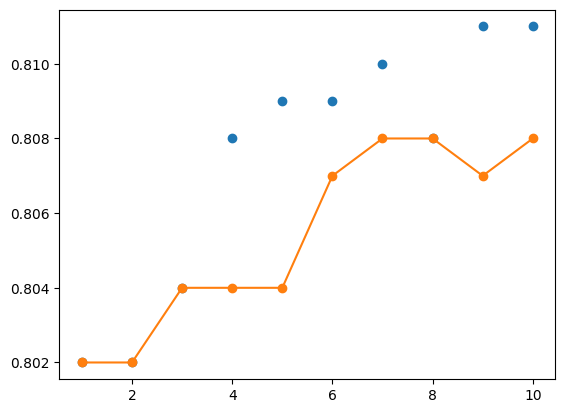

In [22]:
# average of model weights on blobs problem
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import clone_model
from matplotlib import pyplot
from numpy import average
from numpy import array

# load models from file
def load_all_models(n_start, n_end):
  all_models = list()
  for epoch in range(n_start, n_end):
    # define filename for this ensemble
    filename = '/content/model_' + str(epoch) + '.h5'
    # load model from file
    model = load_model(filename)
    # add to list of members
    all_models.append(model)
    print('>loaded %s' % filename)
  return all_models

# # create a model from the weights of multiple models
def model_weight_ensemble(members, weights):
  # determine how many layers need to be averaged
  n_layers = len(members[0].get_weights())
  # create an set of average model weights
  avg_model_weights = list()
  for layer in range(n_layers):
    # collect this layer from each model
    layer_weights = array([model.get_weights()[layer] for model in members])
    # weighted average of weights for this layer
    avg_layer_weights = average(layer_weights, axis=0, weights=weights)
    # store average layer weights
    avg_model_weights.append(avg_layer_weights)
  # create a new model with the same structure
  model = clone_model(members[0])
  # set the weights in the new
  model.set_weights(avg_model_weights)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
  # select a subset of members
  subset = members[:n_members]
  # prepare an array of equal weights
  weights = [1.0/n_members for i in range(1, n_members+1)]
  # create a new model with the weighted average of all model weights
  model = model_weight_ensemble(subset, weights)
  # make predictions and evaluate accuracy
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return test_acc

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# load models in order
members = load_all_models(490, 500)
print('Loaded %d models' % len(members))
# reverse loaded models so we build the ensemble with the last models first
members = list(reversed(members))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
  # evaluate model with i members
  ensemble_score = evaluate_n_members(members, i, testX, testy)
  # evaluate the i'th model standalone
  _, single_score = members[i-1].evaluate(testX, testy, verbose=0)
  # summarize this step
  print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
  ensemble_scores.append(ensemble_score)
  single_scores.append(single_score)
# plot score vs number of ensemble members
x_axis = [i for i in range(1, len(members)+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

>loaded /content/model_490.h5
>loaded /content/model_491.h5
>loaded /content/model_492.h5
>loaded /content/model_493.h5
>loaded /content/model_494.h5
>loaded /content/model_495.h5
>loaded /content/model_496.h5
>loaded /content/model_497.h5
>loaded /content/model_498.h5
>loaded /content/model_499.h5
Loaded 10 models
> 1: single=0.802, ensemble=0.802
> 2: single=0.802, ensemble=0.802
> 3: single=0.804, ensemble=0.803
> 4: single=0.808, ensemble=0.803
> 5: single=0.809, ensemble=0.804
> 6: single=0.809, ensemble=0.804
> 7: single=0.810, ensemble=0.804
> 8: single=0.808, ensemble=0.806
> 9: single=0.811, ensemble=0.807
> 10: single=0.811, ensemble=0.807


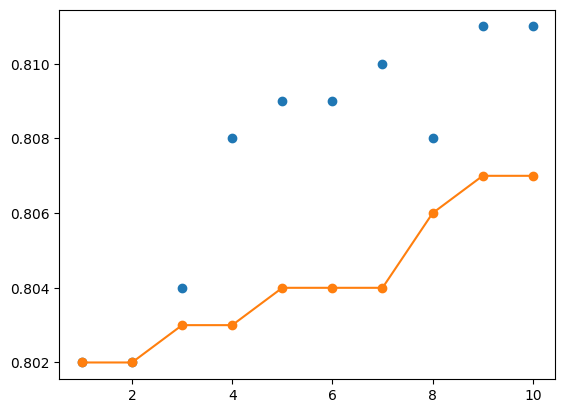

In [23]:
# linearly decreasing weighted average of models on blobs problem
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import clone_model
from matplotlib import pyplot
from numpy import average
from numpy import array

# load models from file
def load_all_models(n_start, n_end):
  all_models = list()
  for epoch in range(n_start, n_end):
    # define filename for this ensemble
    filename = '/content/model_' + str(epoch) + '.h5'
    # load model from file
    model = load_model(filename)
    # add to list of members
    all_models.append(model)
    print('>loaded %s' % filename)
  return all_models

# create a model from the weights of multiple models
def model_weight_ensemble(members, weights):
  # determine how many layers need to be averaged
  n_layers = len(members[0].get_weights())
  # create an set of average model weights
  avg_model_weights = list()
  for layer in range(n_layers):
    # collect this layer from each model
    layer_weights = array([model.get_weights()[layer] for model in members])
    # weighted average of weights for this layer
    avg_layer_weights = average(layer_weights, axis=0, weights=weights)
    # store average layer weights
    avg_model_weights.append(avg_layer_weights)
  # create a new model with the same structure
  model = clone_model(members[0])
  # set the weights in the new
  model.set_weights(avg_model_weights)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
  # select a subset of members
  subset = members[:n_members]
  # prepare an array of linearly decreasing weights
  weights = [i/n_members for i in range(n_members, 0, -1)]
  # create a new model with the weighted average of all model weights
  model = model_weight_ensemble(subset, weights)
  # make predictions and evaluate accuracy
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return test_acc

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# load models in order
members = load_all_models(490, 500)
print('Loaded %d models' % len(members))
# reverse loaded models so we build the ensemble with the last models first
members = list(reversed(members))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
  # evaluate model with i members
  ensemble_score = evaluate_n_members(members, i, testX, testy)
  # evaluate the i'th model standalone
  _, single_score = members[i-1].evaluate(testX, testy, verbose=0)
  # summarize this step
  print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
  ensemble_scores.append(ensemble_score)
  single_scores.append(single_score)
# plot score vs number of ensemble members
x_axis = [i for i in range(1, len(members)+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

>loaded /content/model_490.h5
>loaded /content/model_491.h5
>loaded /content/model_492.h5
>loaded /content/model_493.h5
>loaded /content/model_494.h5
>loaded /content/model_495.h5
>loaded /content/model_496.h5
>loaded /content/model_497.h5
>loaded /content/model_498.h5
>loaded /content/model_499.h5
Loaded 10 models
> 1: single=0.802, ensemble=0.802
> 2: single=0.802, ensemble=0.802
> 3: single=0.804, ensemble=0.803
> 4: single=0.808, ensemble=0.803
> 5: single=0.809, ensemble=0.803
> 6: single=0.809, ensemble=0.804
> 7: single=0.810, ensemble=0.804
> 8: single=0.808, ensemble=0.804
> 9: single=0.811, ensemble=0.804
> 10: single=0.811, ensemble=0.804


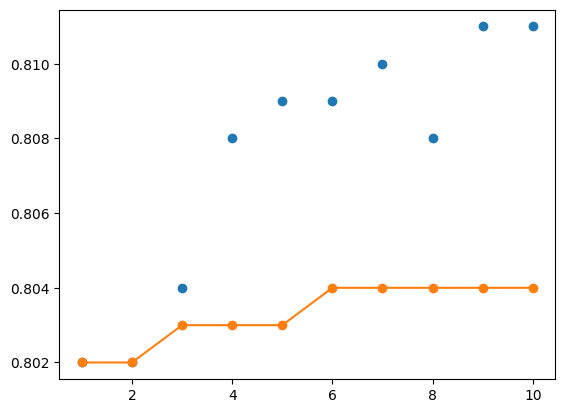

In [24]:
#exponentially decreasing weighted average of models on blobs problem
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import clone_model
from matplotlib import pyplot
from numpy import average
from numpy import array
from math import exp

# load models from file
def load_all_models(n_start, n_end):
  all_models = list()
  for epoch in range(n_start, n_end):
    # define filename for this ensemble
    filename = '/content/model_' + str(epoch) + '.h5'
    # load model from file
    model = load_model(filename)
    # add to list of members
    all_models.append(model)
    print('>loaded %s' % filename)
  return all_models

# create a model from the weights of multiple models
def model_weight_ensemble(members, weights):
  # determine how many layers need to be averaged
  n_layers = len(members[0].get_weights())
  # create an set of average model weights
  avg_model_weights = list()
  for layer in range(n_layers):
    # collect this layer from each model
    layer_weights = array([model.get_weights()[layer] for model in members])
    # weighted average of weights for this layer
    avg_layer_weights = average(layer_weights, axis=0, weights=weights)
    # store average layer weights
    avg_model_weights.append(avg_layer_weights)
  # create a new model with the same structure
  model = clone_model(members[0])
  # set the weights in the new
  model.set_weights(avg_model_weights)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
  # select a subset of members
  subset = members[:n_members]
  # prepare an array of exponentially decreasing weights
  alpha = 2.0
  weights = [exp(-i/alpha) for i in range(1, n_members+1)]
  # create a new model with the weighted average of all model weights
  model = model_weight_ensemble(subset, weights)
  # make predictions and evaluate accuracy
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return test_acc

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# load models in order
members = load_all_models(490, 500)
print('Loaded %d models' % len(members))
# reverse loaded models so we build the ensemble with the last models first
members = list(reversed(members))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
  # evaluate model with i members
  ensemble_score = evaluate_n_members(members, i, testX, testy)
  # evaluate the i'th model standalone
  _, single_score = members[i-1].evaluate(testX, testy, verbose=0)
  # summarize this step
  print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
  ensemble_scores.append(ensemble_score)
  single_scores.append(single_score)
# plot score vs number of ensemble members
x_axis = [i for i in range(1, len(members)+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()